# Generative Adversarial Network

Generative modelling is unsupervised machine learning task that involves in discovering and learning the patterns in the input dataset in such a way that this model can be utilized to generate input or output of new samples that may  or may not be drawn from the original dataset.

**Generative Adversarial Network (GAN) was introduced by Ian Goodfellow and few of his researchers at University of Montreal.** This was also named as Adversarial training at Facebook AI research center and was also named as one of the most interesting things  in last decade.

A very common application of GAN’s are image completion. This application is handy where we need to remove certain part of images and would like to replace the imperfection by replacing it with a background or similar operation.  These methods use neighboring pixel values when filling.

Suppose we have an image y and this image is being analyzed by the discriminator D which gives a value 0 if the image is fake and value of 1 if the image is as real as the natural dataset image.  The generator G takes a vector that is randomly sampled from the known uniform normal distribution. The image generated at generator G should help to train the discriminator function . 

The discriminator is showed two images simultaneously one from generator G and another from the original dataset. The generator keeps on getting trained to generate image to fool the discriminator here the generator learns to maximize the output of D and discriminator learns to minimize the output. These both are trying to do against each other this is where the name ‘**Adversarial Training**’ come into picture. Maximize D (y) if y is drawn from the generator G or minimize if it’s from the dataset.

GAN’s are a good way to train a generative network, there are two models which are being trained in adversarial process, the generator learns to create images that look like the original, while the discriminator understands to detect real images apart from the created ones.

When training GAN’s, the generator progressively gets trained to create better and better at creating images that look alike the original images,  on the other hand the discriminator will get trained or better in telling the images fake or real. Then there is also a state wherein the discriminator cannot distinguish any more fake images such state is known as equilibrium.

![alt text](https://docs.google.com/drawings/d/e/2PACX-1vQoM9iv4meHjiwJyHGGxRA0lJt8b7a0jdBJz4FC7UD2e0jDCeL1kkYhs6Y-Pfb2yOO854WQd07IBmLi/pub?w=589&h=390)

The above image shows the working of Generator and Discriminator. Initially the generator fails to generate images of t-shirt for instance, as the number of trails keeps on increasing it starts to fool the discriminator. The diagram indicated after numerous attempts the discriminater could not find the difference between the original image and created image.

# How does the GAN works?

The generator generates new data (in this case images), the other neural network discriminates these images as fake or real.  It classifies the image as either it belonged to an actual dataset or not.

For instance, the generator will generate an image of T-shirt like those found in Fashion MNIST, the discriminator is built to detect this T-shirt image is not from the authentic dataset. The task of the generator is to create images which passes the discriminator, the images generated after many iterations will succeed in passing through the discriminator. 

The generator takes image label and returns the image of that category, this generated image is passed in stream to the discriminator across other selected images from the actual dataset. The discriminator takes both real and fake images and return the probabilities between 0 and 1. One represents the image belongs to original and zero as fake.

For the Fashion MNIST, the discriminator is a CNN that can classify images which is fed, it is a binomial classifier which categorizes the images as fake or real.  The generator in GAN is a inverse convolutional network i.e. in normal CNN it takes the images, down samples it to produce the image. In GAN the Generator network will take set of random n-dimension noise and upscales it to produce an image.  Both Generator and discriminator are optimizing a different objective function or loss. 

![alt text](https://docs.google.com/drawings/d/e/2PACX-1vQ4bqZeiG-IlYWbANxNiiBcBxMjlpZ-F0HslS9PdYglZ_KT_2SonW-OcyqeZPBHx9tI4EH3rAzKb_1Y/pub?w=535&h=688)

The above flow chart represents the flow of the GAN.


![alt text](https://docs.google.com/drawings/d/e/2PACX-1vTaqIeW7wbzl865TYQfDoL2rssTLbDqj9LdFxIqwTRQdvcQYZ59MsaNKKm7qd9MtiOrvAAWgZ_59zJU/pub?w=625&h=375)

The above figure represents the Final classification of Discriminator as real images after numerous trails. 



# Application of GAN’s:

•	To Generate new images from the training data. In this tutorial will train the network with fashion dataset and generate new fashion data.
•	Image competition , to recover a part of lost or cut image or to remove part of image or to fill the background. 


# Main components of a Generative Adversarial network:

•	**Generator** : This network starts with creating noisy images based upon provided n dimensional random input data.  It has a main responsibility of coming up with images as close as real ones.

•	**Discriminator** : This network tries to figure out which is real, and which is fake.


# Fashion MNIST

In this tutorial Generative Adversarial Network is implemented on Fashion MNIST dataset.

  Fashion MNIST is a dataset of Zalando's article images, the dataset contains a set of 60000 train examples and 10000 test examples. Each of the images in this dataset is 28X28 greyscale image and it is associated with a label from 10 classes. This dataset can be used as a drop-in replacement for MNIST. The class labels are:

|label| Description|
|--------|---------------|
0| T-shirt/top|
1| Trouser|
2| Pull over|
3| Dress|
4| coat|
5| sandal|
6| Shirt|
7| Sneaker|
8| Bag|
9| Ankle Boot|

Each image is 28 pixels in height and 28 pixels in width making it to a total of 784 pixels. Each and every pixel in the image has a single pixel value associated with it which indicates the lightness or darkness of that particular pixel. The pixel value is an integer between 0 to 255. The training and testing data consist of 785 columns 785th represents the class label.

The pixels on an image can be located x= I * 28 + J,  where I and J are the integers between 0 and 27, the pixel which has to be located lies in Ith row and Jth column in 28X28 matrix. 

In [0]:
import imageio
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display
import tensorflow as tf

In [0]:
#download and save fashion mnist data from tensorflow google storage.
(train_images, train_labels), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# Normalize the images to [-1, 1]
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5

In [0]:
#Shuffle data into batches of 256
batch_size = 256
shuffle_size = 60000
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(shuffle_size).batch(batch_size)

# Generator: 

The generator processes the fake images, these images are created from a 100-dimensional noise -  uniform distribution which uses the inverse convolution and it is also called as transposed convolution. In between the convolutional layers batch normalization stabilizes learning. The activation function after each layer is LeakyRelu, the output at the last layer produces the fake image i.e. the sigmoid produces the image. 

For instance, the generator will generate an image T-shirt like those found in Fashion MNIST, the discriminator is built to detect this T-shirt image is not from the authentic dataset. The task of the generator is to create images which passes the discriminator, the images generated after many iterations will succeed in passing through the discriminator. 
The generator takes image label and returns the image of that category, this generated image is passed in stream to the discriminator across other selected images from the actual dataset. The discriminator takes both real and fake images and return the probabilities between 0 and 1. One represents the image belongs to original and zero as fake.

For the Fashion MNIST, the discriminator is a CNN that can classify images which is fed, it is a binomial classifier which categorizes the images in fake or real.  The generator in GAN is a inverse convolutional network i.e. in normal CNN it takes the images, down samples it to produce the image. In GAN the Generator network will take set of random n-dimension noise and upscales it to produce an image.  Both Generator and discriminator are optimizing a different objective function or loss. 
Sigmoid Cross-Entropy Loss, this is a sigmoid plus Cross Entropy loss, this is used since it is independent of each class (component). This is mainly used in multi label classification. 

![alt text](https://docs.google.com/drawings/d/e/2PACX-1vSXRjfNvVoPoPXiTt54EWQB_aHfS0HTGsJwcjAVNhB8UCA8m43RaxzxJlKA7O6DXUWOPFKk8E4avgSM/pub?w=625&h=241)

The above block diagram represents the flow of generation of fake image from the generator network and stream line towards discriminator.


. In GAN the Generator network will take set of random n-dimension noise and upscales it to produce an image.  Both Generator and discriminator are optimizing a different objective function or loss. 

# Loss function 

Sigmoid Cross-Entropy Loss, this is a sigmoid plus Cross Entropy loss, this is used since it is independent of each class (component). This is mainly used in multi label classification. 

![alt text](https://docs.google.com/drawings/d/e/2PACX-1vQ0sbTjFIarm67YVWK_FLg1JZyaRU-ask8vCiCrV0ML6HHH_OjyaqCV3uFuo7SXypnhFPX5CrjqRQey/pub?w=570&h=276)

The above equation represents **Binary cross entropy loss and C =2**. The classes C=2 represents either the image is real or fake. 

The output of sigmoid function to cross entropy loss f(si), the sigmoid creates the input in range (0,1) and it is applied individually to each element or image (si). It also sometimes called a logistic function.

![alt text](https://docs.google.com/drawings/d/e/2PACX-1vSIcZVmbkHLAZc2QiSk6oitF-5OZGgMFgNVyt6uCmDBP-yt8dgoiOqJkBjr5Tyfy74SgZ7M2hg-fpqe/pub?w=321&h=215)

# LeakyRelu:

A rectified Linear Unit is closer to the human neurons work. The output of Relu is equal to zero when the input is less than zero and the output is equal to input when input is greater than zero. 
Relu is non-linear and it has better performance than sigmoid which suffers from back propagation, also for larger neural network the speed of building model using Relu is faster. 
Some disadvantages of Relu are the neurons remains inactive no matter  what the input is supplied, and this can be overcome by using Leaky Relu.  In Leaky Relu where slope is changed for negative x values thus causing a leak in Relu and extending the range of RELU.

![alt text](https://docs.google.com/drawings/d/e/2PACX-1vR8v5svGl0NjE6L6w119pEweU33FVIKpZJFFQ24V7NakWY6ZyBcYusSR9R8x643kgHiCF0OrsJFQemG/pub?w=625&h=357)





In [0]:
#create generator model
def generator_model():
  model = tf.keras.Sequential() # Create a sequential model 
  # add layers to sequential model
  model.add(layers.Dense(units=7*7*256, input_dim=100,use_bias=False)) # layer with 7*7*256 vector ouput and input vector of shape 100
  #to avoid overfitting in training
  model.add(layers.BatchNormalization()) # Normalize at each batch
  model.add(layers.LeakyReLU(alpha=0.2)) # Add a small fraction instead of 0 when unit is inactive i.e.,negative
  
  model.add(layers.Reshape((7,7,256))) #reshape the vector output into 3d matrix of 7x7x256 shape
  assert model.output_shape == (None,7,7,256) # declare a rule/exception handler to prevent from any other dimensions

  #convert to 7x7x128 with convolutional striding of 1
  model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
  assert model.output_shape == (None,7,7,128) # declare a rule/exception handler to prevent from any other dimensions
  model.add(layers.BatchNormalization()) #again add batch normalization to prevent from overfitting
  model.add(layers.LeakyReLU(alpha=0.2))

  #convert to 7x7x64 with convolutional striding of 1
  model.add(layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False))
  assert model.output_shape == (None,14,14,64) # declare a rule/exception handler to prevent from any other dimensions
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU(alpha=0.2))

  model.add(layers.Conv2DTranspose(32, (5,5),strides =(2,2), padding='same', use_bias= False))
  assert model.output_shape == (None,28,28,32)
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU(alpha=0.2))

  #output layer with activation tanh to get positive and negative outputs
  model.add(layers.Conv2DTranspose(1, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
  assert model.output_shape == (None,28,28,1)

  return model

![alt text](https://docs.google.com/drawings/d/e/2PACX-1vTXd8HDZtYmLINFxq-0CRgfLdaIhXfLDu0bE6xo7SiLRzZHjarjLCRx1PGwYzO6zw1jMF7o49QRyOxc/pub?w=864&h=1728)

The figure above describes the flow of our generator model.

The first input layer is a vector of size 100 which contains normalized random values.
A dense layer converts these 100 values into a vector of size 7*7*256=12544.
Normalizing these values again and applying a leaky relu cost.
Reshaping this vector into a 7X7X256 matrix. Thus generating 128 different samples of 7X7 images.
Continuing in this manner and unsampling the outputs of each layers till we get an output image of 28x28 grayscale image.
The model uses LeakyReLU activation and tanh activation for output layer which are suggested best practices for GAN.


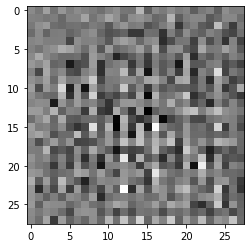

In [0]:
generator = generator_model() #create generator object
noise = tf.random.normal([1, 100]) #create a vector of normally distributed random values of shape (100,)
generated_image = generator(noise, training=False) #generate image

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

# Discriminator:

The discriminator distinguishes how real is the image, the discriminator is a deep convolutional Neural Network. For instance, fashion MNIST dataset the input image is 28x28x1, the sigmoid provides a value of the probability of the reality of the image 0.0 to 1.0, where 0.0 is a fake image and 1 being the real image. The one main difference from regular CNN is that there is no max pooling layer in between. Instead a strided convolution is used in down sampling.  The activation function used in CNN layers are Leaky Relu. A drop out layer is also used  to prevent the overfitting or memorization of the data. 

The output of the discriminator is sigmoid hence binary cross entropy used to calculate the loss function. 


In [0]:
def discriminator_model():
  model = tf.keras.Sequential() #create a sequential model
  model.add(layers.Conv2D(32, (5,5), strides=(1,1), padding='same', input_shape=[28,28,1])) #add convolution layer
  model.add(layers.LeakyReLU(alpha=0.2)) # avoiding overfitting with leakyRelu and Dropout
  model.add(layers.Dropout(0.4))

  model.add(layers.Conv2D(64, (5,5), strides=(2,2), padding='same'))
  model.add(layers.LeakyReLU(alpha=0.2))
  model.add(layers.Dropout(0.4))

  model.add(layers.Conv2D(128, (5,5), strides=(2,2), padding='same'))
  model.add(layers.LeakyReLU(alpha=0.2))
  model.add(layers.Dropout(0.4))

  model.add(layers.Flatten())
  model.add(layers.Dense(1)) #output dense layer

  return model


![alt text](https://docs.google.com/drawings/d/e/2PACX-1vRZ8qQWi0cI91wTMibMvImsli3bdHt_e4VSV-cucMLVQHMseiPg8BjE370i7mPVcYgPh9wGML2k7-Hj/pub?w=720&h=1152)



> The figure above shows the discriminator model layer by layer.
> The input layer takes an input of 28x28 grayscale image. It has an output layer of size 1 i.e., the output is binary (real or fake/ 0 or 1).
The Dropout and Leaky ReLU with slope 0.2 helps prevent overfitting and are recommended best practice for GAN.





In [0]:
discriminator = discriminator_model() #create a discriminator model object

realorfake = discriminator(generated_image) #pass the previously generated image to the discriminator
print(realorfake)  # positive if real. negative if fake.

tf.Tensor([[-0.00069341]], shape=(1, 1), dtype=float32)


The negative value given out by the descriminator tells that the image is generated and not real.


In this experiment for both the models BinaryCross Entropy loss function will be used.

In [0]:
#cross entropy calculator
crossentropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

Create a loss function for discriminator model.
The loss is the sum of the predictions the discriminator makes for real and generated images.


In [0]:
def discriminator_loss(real_output, fake_output):
  real_loss = crossentropy(tf.ones_like(real_output), real_output)
  fake_loss = crossentropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss+fake_loss

  return total_loss

Calculate loss for generator based on the number of times it was unable to fool the discriminator. 

In [0]:
def generator_loss(fake_output):
  loss = crossentropy(tf.ones_like(fake_output), fake_output)

  return loss

Using the Adam optimizer with learning rate of 0.0001 for both the models as per the GANs recommended practices.

As the models are trained separately we create two optimizers for the two models.

In [0]:
#create two different optimizers for discriminator and generator models
rate = 0.0001
discriminator_optimizer = tf.keras.optimizers.Adam(rate, beta_1=0.5)
generator_optimizer = tf.keras.optimizers.Adam(rate, beta_1=0.5)

In [0]:
noise_dim = 100 # dimension of the vector
num_epochs = 50 # number of epochs 

The function train_step is a single step performed in each epoch.
A vector of size 100 containing normalized values is generated every time and passed to the generator.
The generator outputs an image which is judged by the discriminator.

The gradient is calculated for both the models separately and passed to update the models.

In [0]:
@tf.function
def train_step(images):
  noise = tf.random.normal([batch_size, noise_dim])

  with tf.GradientTape() as generator_tape, tf.GradientTape() as discriminator_tape:
    generated_images = generator(noise, training=True)

    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

  gradients_of_generator = generator_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = discriminator_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

Lets generate 16 such samples. Each of these sample will be processed through the models for 50 epochs.

In [0]:
num_examples = 16
seed = tf.random.normal([num_examples, noise_dim])

the function below will be used for plotting the grayscale images in each epoch.

In [0]:
#plot images and save to file.
def plot_images(model, epoch, test_input):
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(8,8))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

Lets train the models now.

In [0]:
#train the models
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for batches in dataset:
      train_step(batches)
      #display.clear_output(wait=True)
    plot_images(generator,
                epoch + 1,
                seed)
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))
      
  #display.clear_output(wait=True)
  plot_images(generator,
              epochs,
              seed)


The matrix below shows the images generated by the models at the 50th epoch. 

In [0]:
#PIL.Image.open('image_at_epoch_0050.png)

As we observe below the training started with an almost black image.
The images start looking more and more like the fashion mnist data after each step of training.
The trend can be seen in the images shown below.

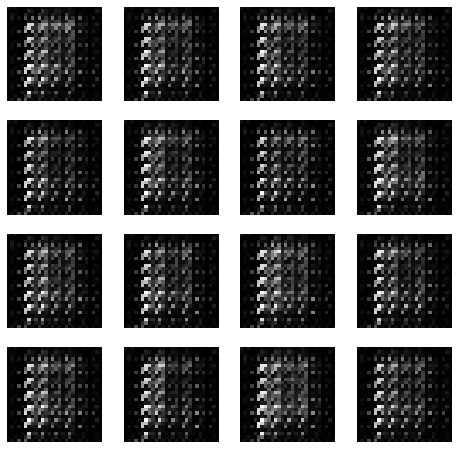

Time for epoch 1 is 21.34330463409424 sec


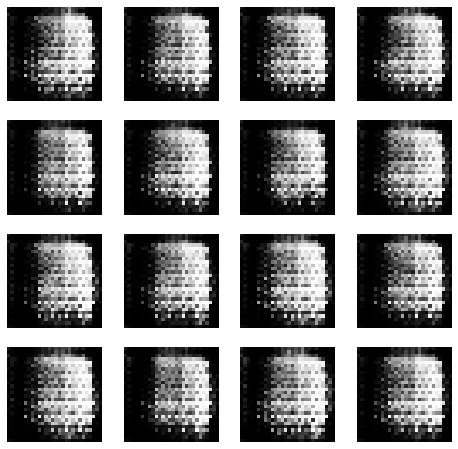

Time for epoch 2 is 18.869683027267456 sec


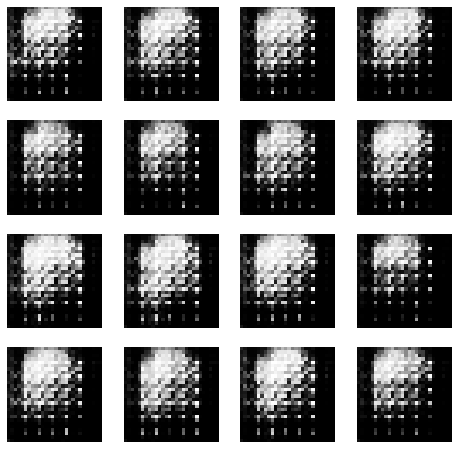

Time for epoch 3 is 18.968183994293213 sec


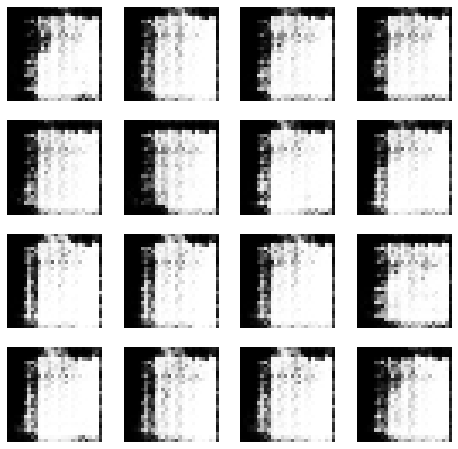

Time for epoch 4 is 19.27549123764038 sec


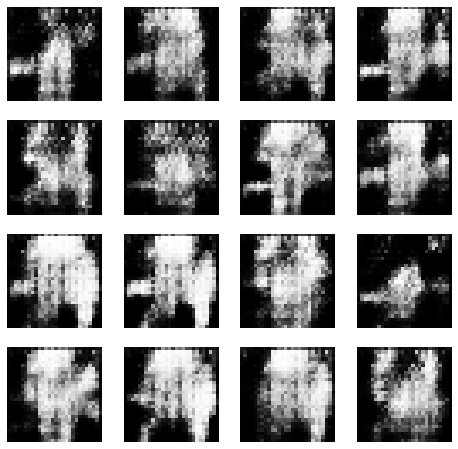

Time for epoch 5 is 19.323328018188477 sec


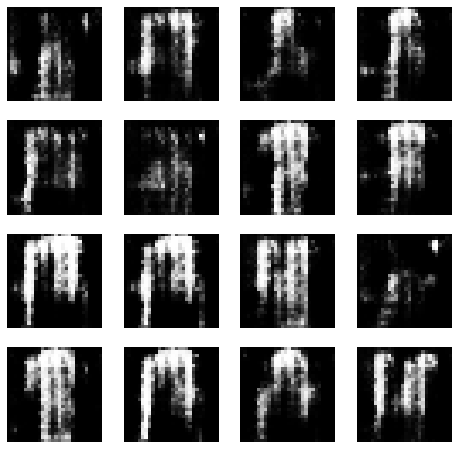

Time for epoch 6 is 19.525523900985718 sec


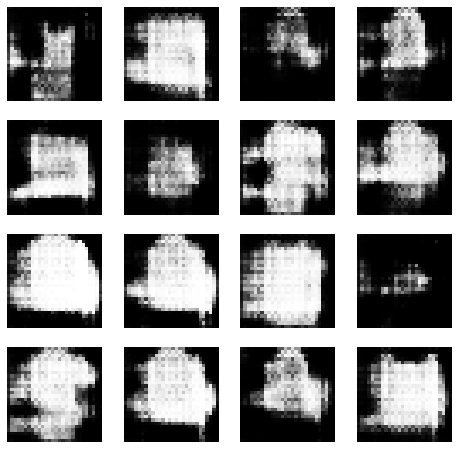

Time for epoch 7 is 19.742218017578125 sec


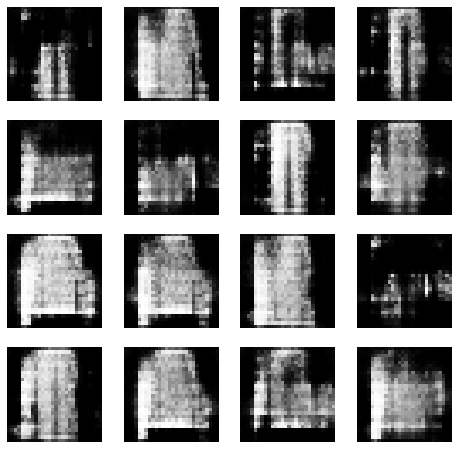

Time for epoch 8 is 19.615943908691406 sec


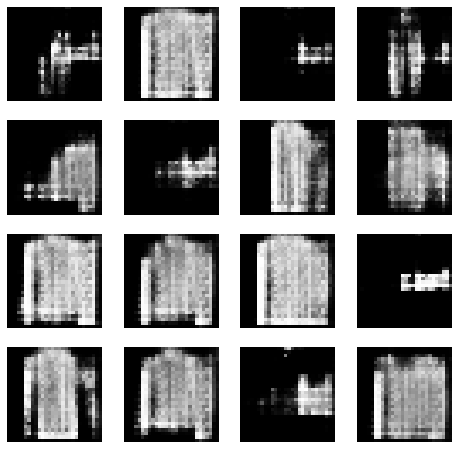

Time for epoch 9 is 19.645943880081177 sec


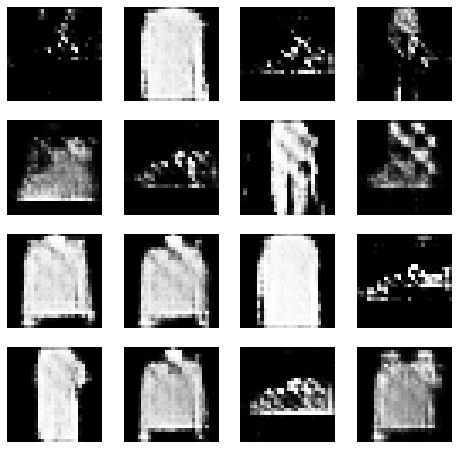

Time for epoch 10 is 19.916417121887207 sec


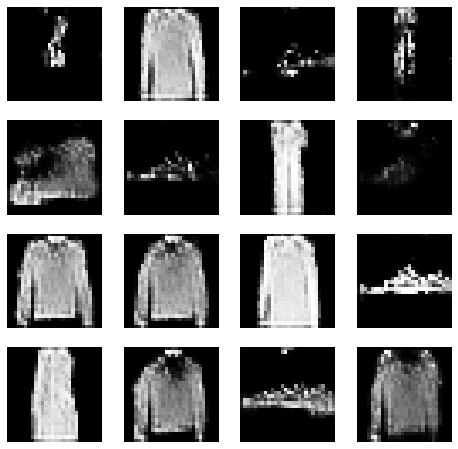

Time for epoch 11 is 19.896177053451538 sec


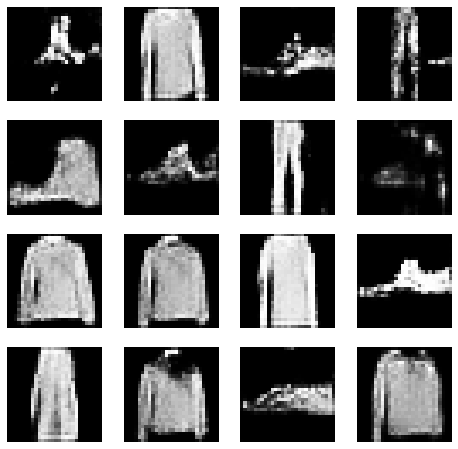

Time for epoch 12 is 20.10624074935913 sec


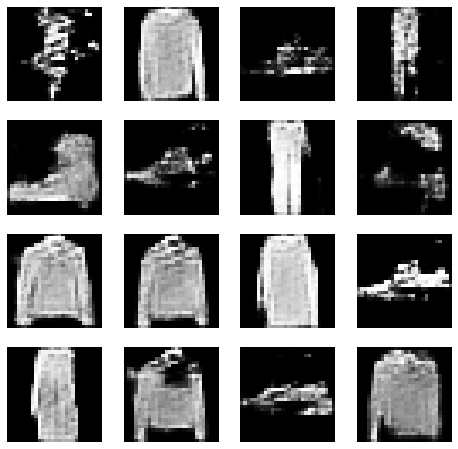

Time for epoch 13 is 20.01258945465088 sec


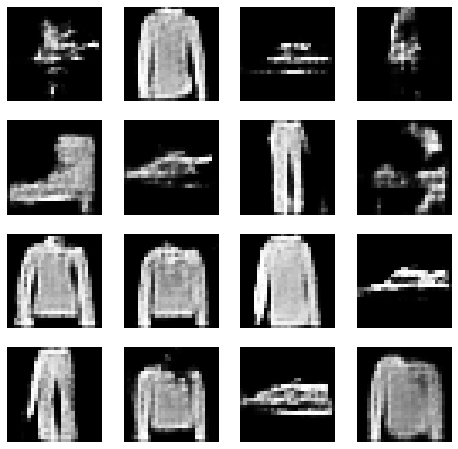

Time for epoch 14 is 19.974926710128784 sec


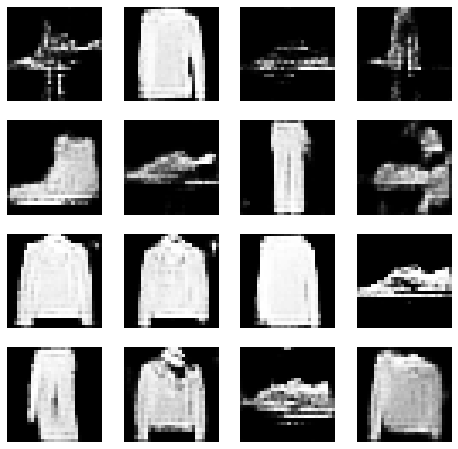

Time for epoch 15 is 20.15720272064209 sec


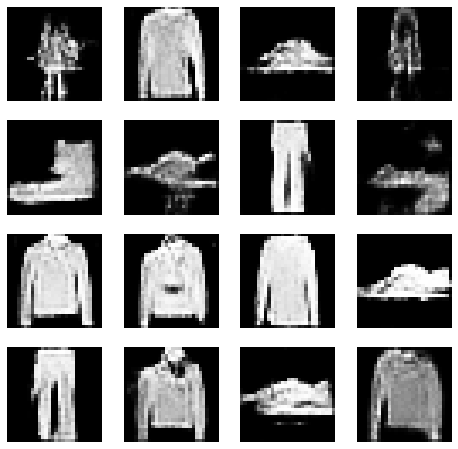

Time for epoch 16 is 20.01414155960083 sec


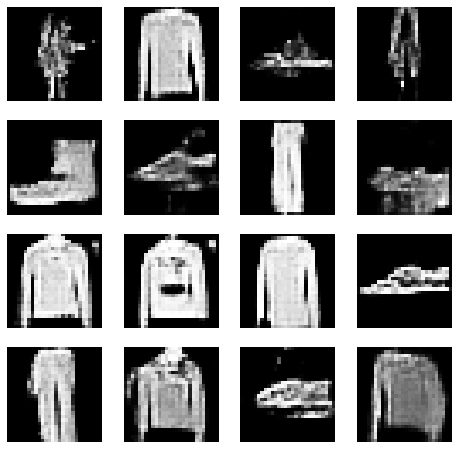

Time for epoch 17 is 20.000839948654175 sec


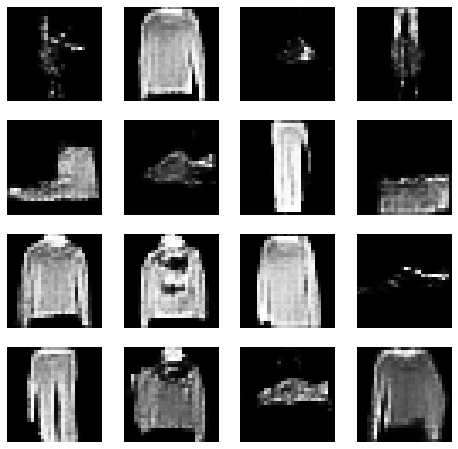

Time for epoch 18 is 20.099934577941895 sec


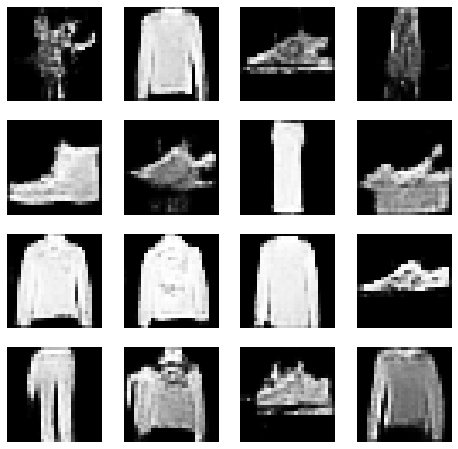

Time for epoch 19 is 19.988431453704834 sec


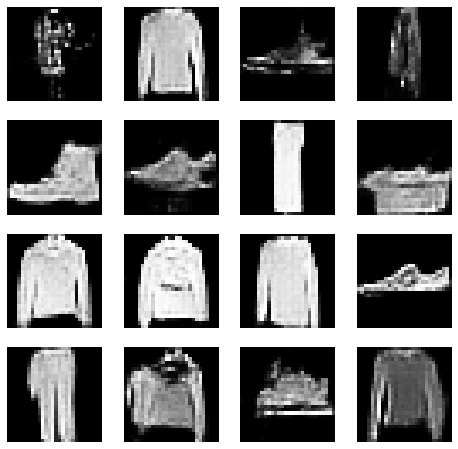

Time for epoch 20 is 19.978673696517944 sec


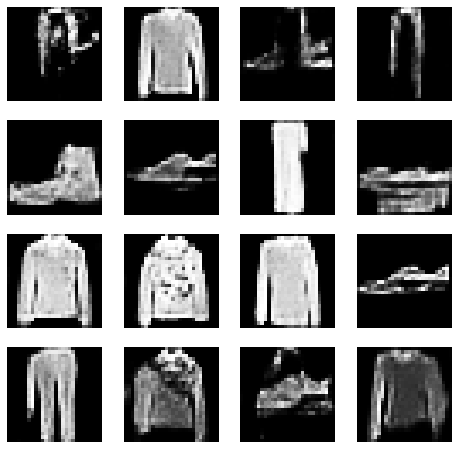

Time for epoch 21 is 20.091675281524658 sec


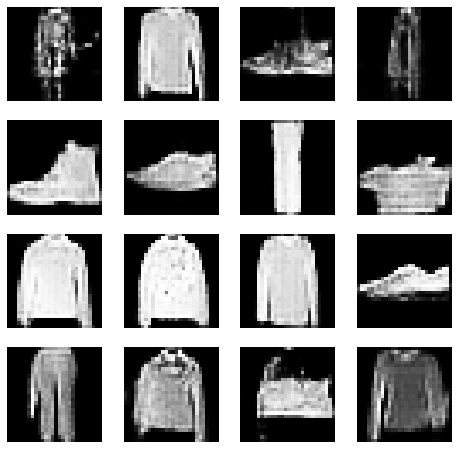

Time for epoch 22 is 19.970677137374878 sec


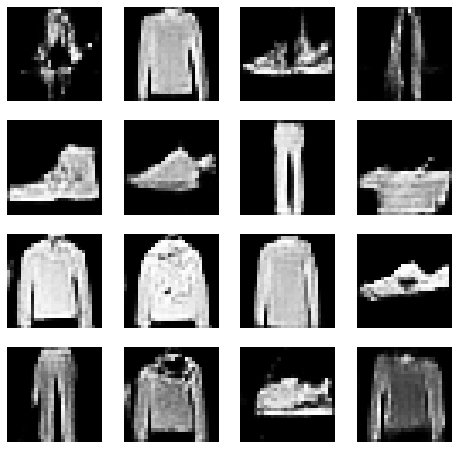

Time for epoch 23 is 20.12199592590332 sec


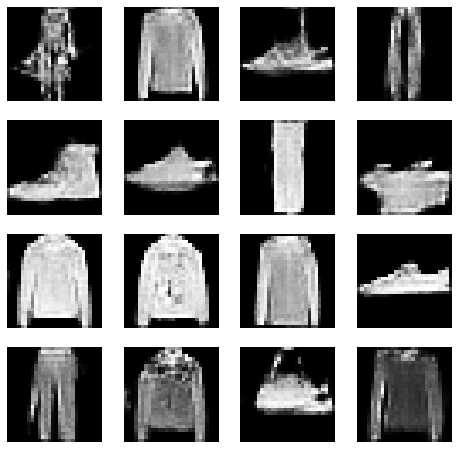

Time for epoch 24 is 20.00849461555481 sec


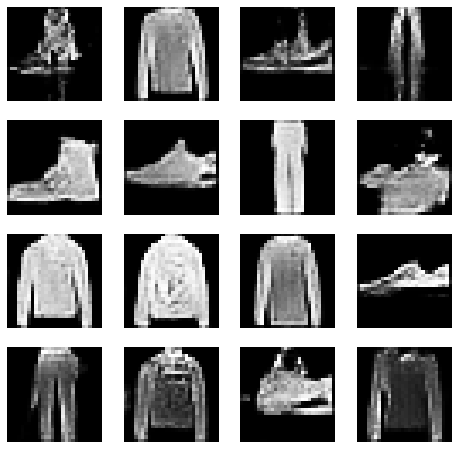

Time for epoch 25 is 20.007033348083496 sec


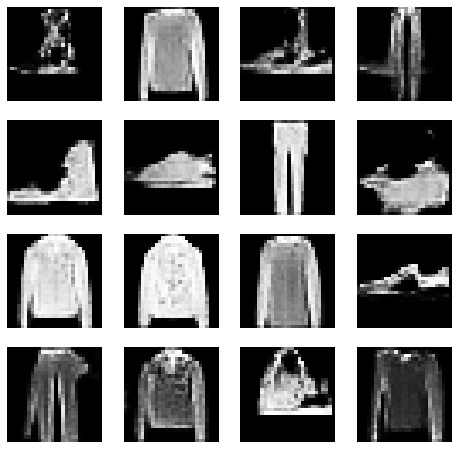

Time for epoch 26 is 20.118691205978394 sec


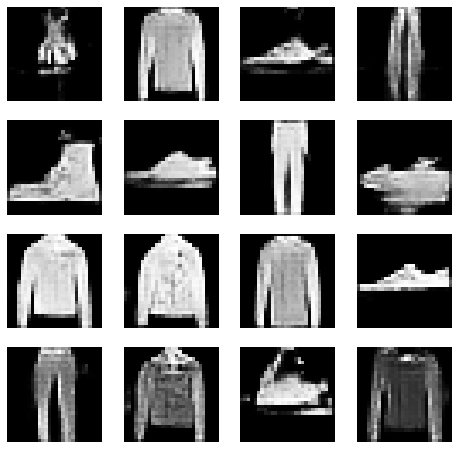

Time for epoch 27 is 19.947497606277466 sec


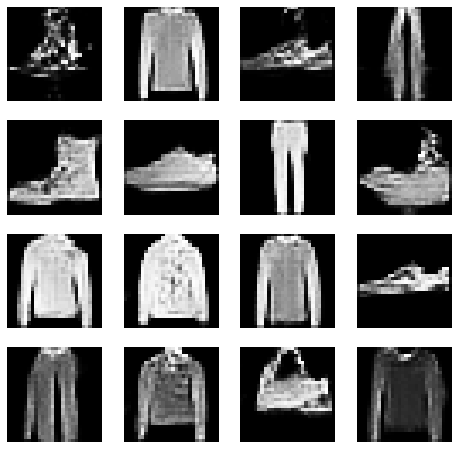

Time for epoch 28 is 19.951940059661865 sec


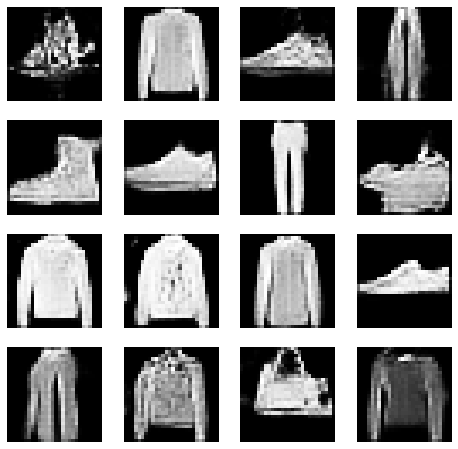

Time for epoch 29 is 20.091471910476685 sec


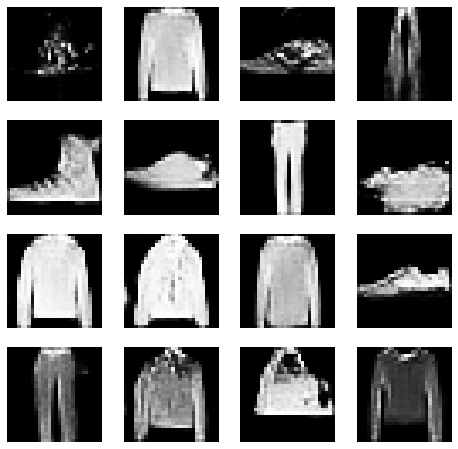

Time for epoch 30 is 19.973424196243286 sec


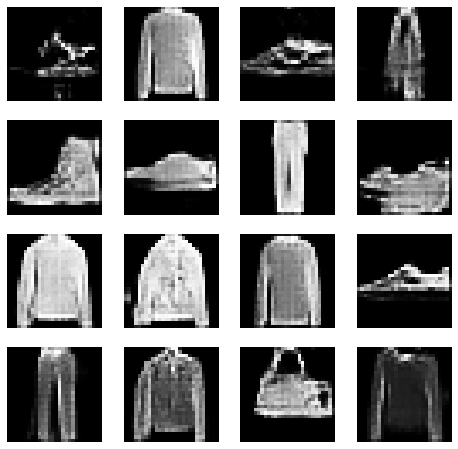

Time for epoch 31 is 19.987741947174072 sec


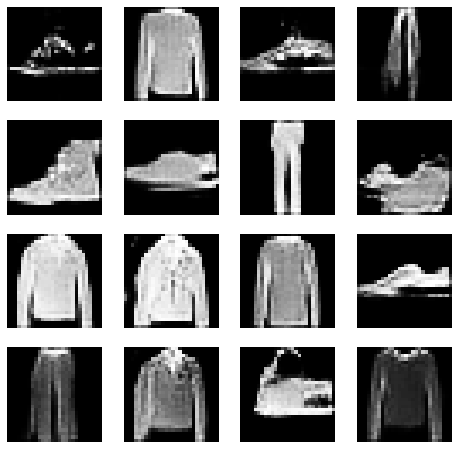

Time for epoch 32 is 20.140120267868042 sec


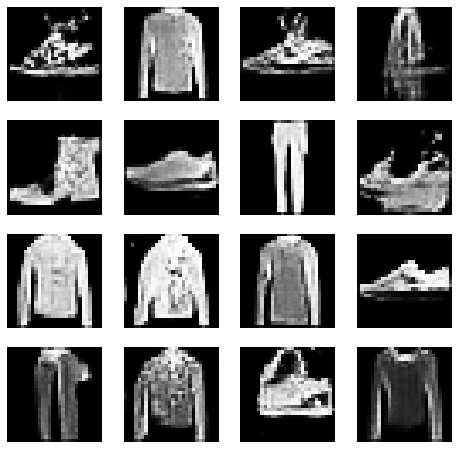

Time for epoch 33 is 19.990339517593384 sec


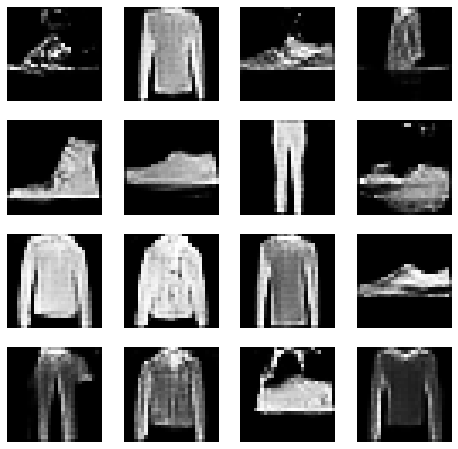

Time for epoch 34 is 20.12763261795044 sec


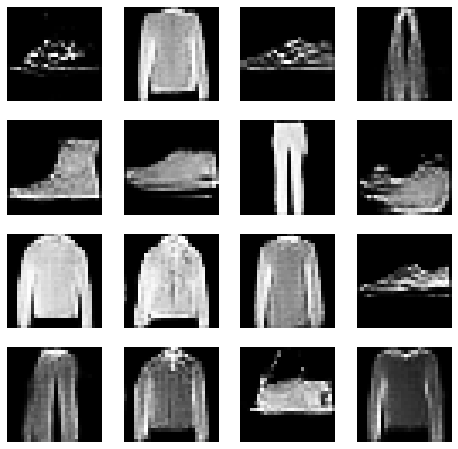

Time for epoch 35 is 20.0047926902771 sec


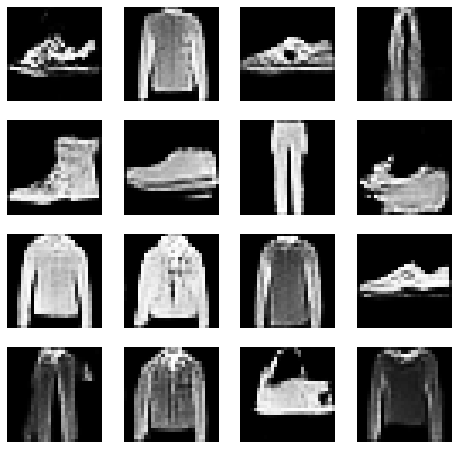

Time for epoch 36 is 20.01101326942444 sec


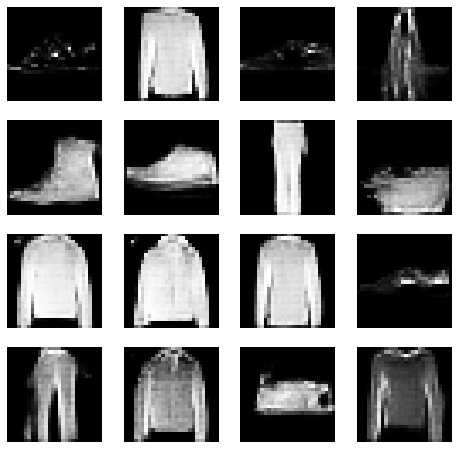

Time for epoch 37 is 20.151517391204834 sec


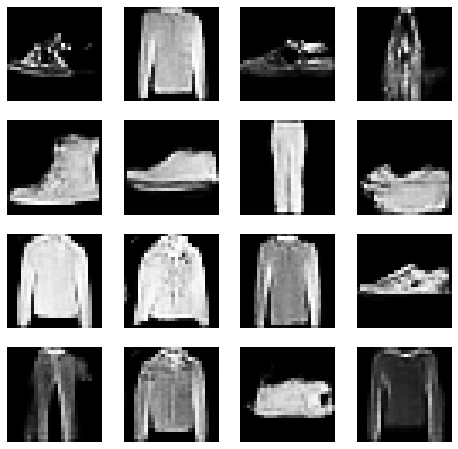

Time for epoch 38 is 19.94832444190979 sec


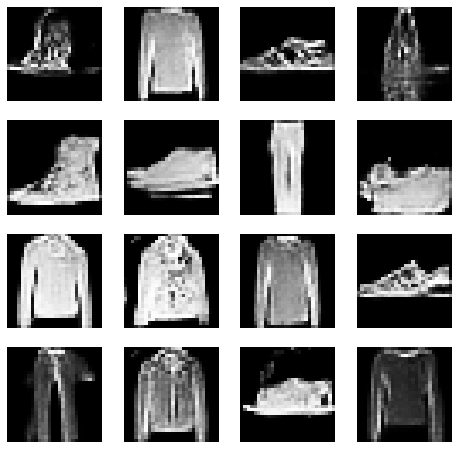

Time for epoch 39 is 19.94014024734497 sec


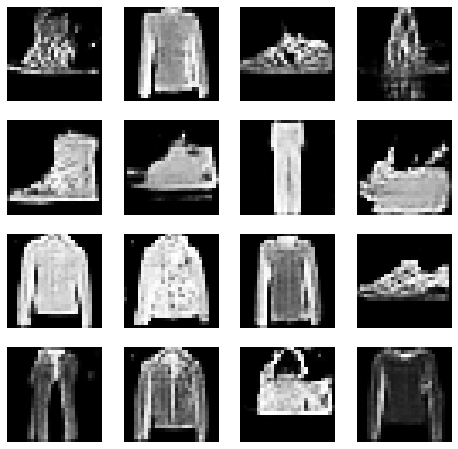

Time for epoch 40 is 20.109861135482788 sec


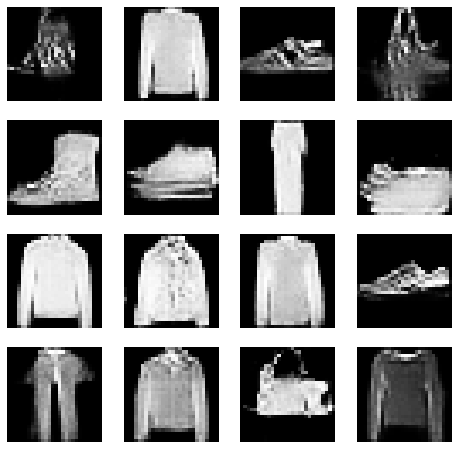

Time for epoch 41 is 19.95358180999756 sec


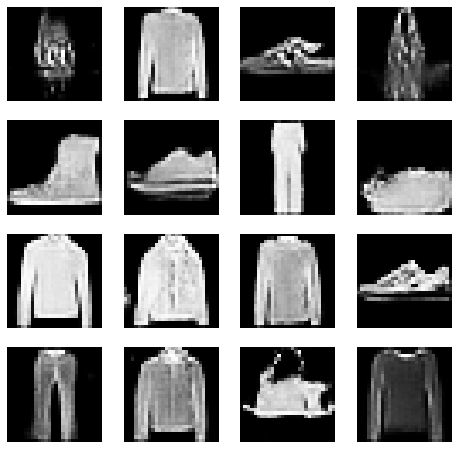

Time for epoch 42 is 19.986766576766968 sec


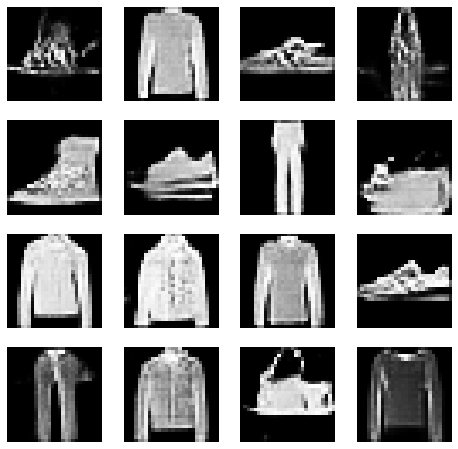

Time for epoch 43 is 20.12521481513977 sec


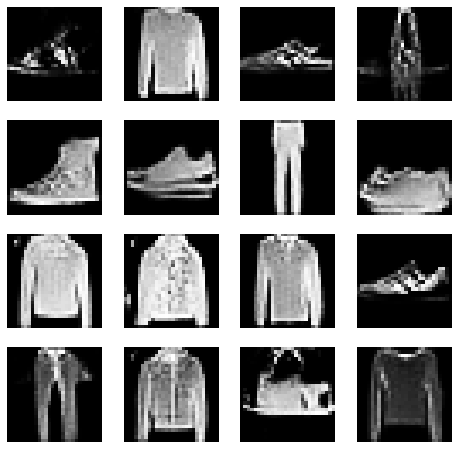

Time for epoch 44 is 19.98396587371826 sec


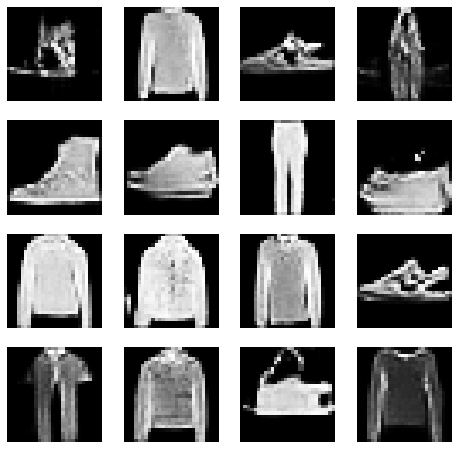

Time for epoch 45 is 20.109697103500366 sec


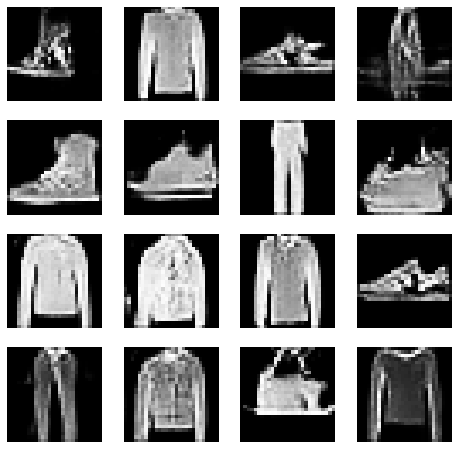

Time for epoch 46 is 20.02203631401062 sec


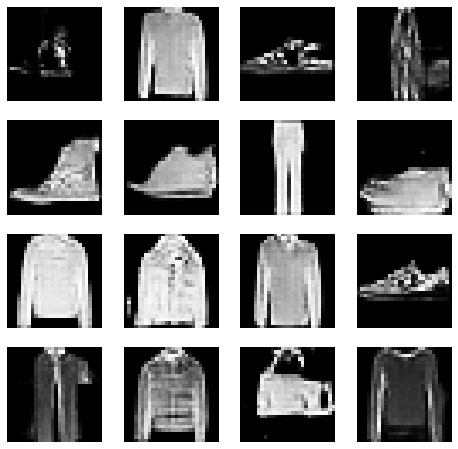

Time for epoch 47 is 20.033817768096924 sec


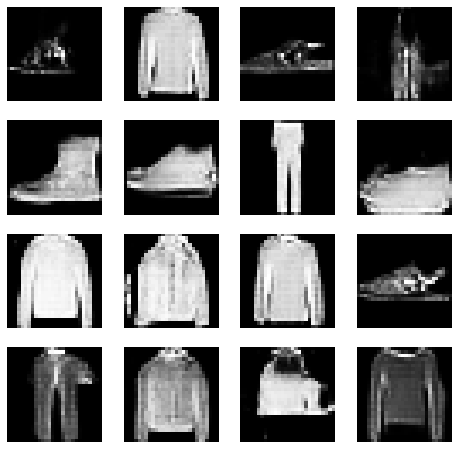

Time for epoch 48 is 20.177335262298584 sec


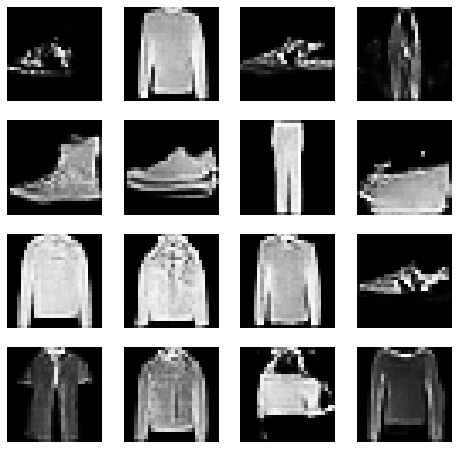

Time for epoch 49 is 19.99777579307556 sec


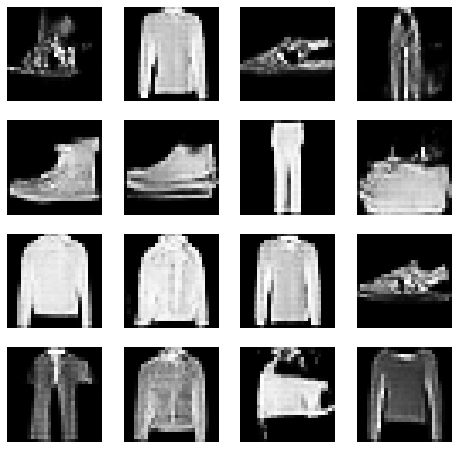

Time for epoch 50 is 19.960550546646118 sec


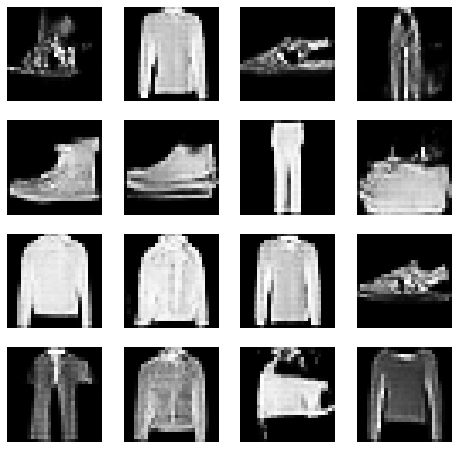

In [0]:
train(train_dataset, num_epochs)

**Conclusion** :  Using the sequential model and the recommended practices like LeakyReLU for loss function, Adam optimizer gradient descent, batch normalization and dropout to ovoid overfitting, the generator model was able to generate images almost similar to real data. 
This can be further improved by using the functional models of tensorflow keras.



References:

1. Deep Learning slides by Dr Timothy Havens.
2. https://www.tensorflow.org/tutorials/generative/dcgan - For basic code and understanding the flow.
3. https://arxiv.org/pdf/1701.00160.pdf - Theory behind the Generative Adversarial Network.
4. https://pathmind.com/wiki/generative-adversarial-network-gan - Theory behind GAN's
5. https://towardsdatascience.comgan-by-example-using-keras-on-tensorflow-backend-1a6d515a60d0  -Theory and understanding the concepts.
6. https://gombru.github.io/2018/05/23/cross_entropy_loss/ - For understanding the sigmoid, Leaky relu funcgtions.
7. https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e - Sigmoid, Relu, Leaky relu.